# S&P 500 Stock Predictor - Multiple Linear Regression
In this module, we will predict a stock index for the S&P 500 based on interest rates and employment numbers. This simple implementation of multiple linear regression will help demonstrate the major steps undertaken in doing the regression technique.

### Libraries & Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
stock_df = pd.read_csv('S&P500_Stock_Data.csv')

In [3]:
stock_df.sample(5)

,Interest Rates,Employment,S&P 500 Price
430,2.103879,53.473042,2287.545988
505,1.866020,52.136442,2207.331004
161,2.140239,50.268090,2238.404644
880,2.192705,52.889403,2313.120071
808,1.960792,59.868800,2133.682183


In [4]:
stock_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Interest Rates,1000.0,2.195392,0.241630,1.5,2.035735,2.198214,2.359061,3.0
Employment,1000.0,56.254855,4.862178,40.0,53.029784,56.160941,59.422633,70.0
S&P 500 Price,1000.0,2319.999936,193.854745,1800.0,2190.447901,2312.443024,2455.764327,3000.0


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Interest Rates    1000 non-null float64
Employment        1000 non-null float64
S&P 500 Price     1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


## Exploratory Data Analysis (EDA)

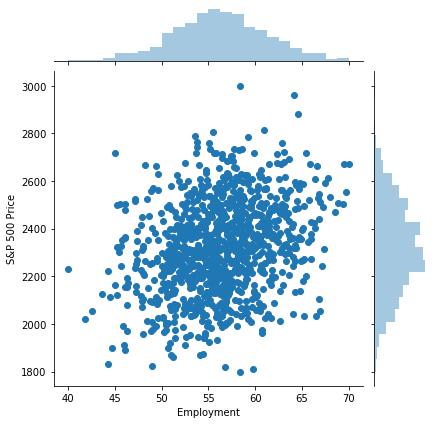

In [6]:
sns.jointplot(x='Employment', y='S&P 500 Price', data=stock_df)
plt.show()

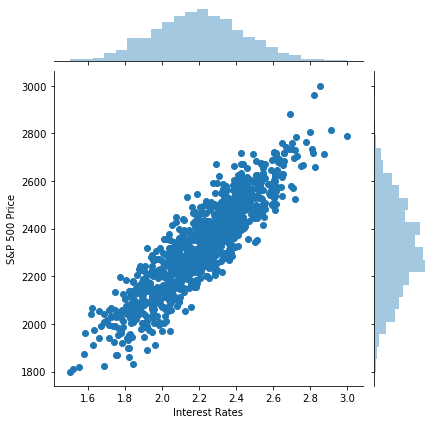

In [7]:
sns.jointplot(x='Interest Rates', y='S&P 500 Price', data=stock_df)
plt.show()

There seems to be a linear relationship between interest rates and the S&P Price.

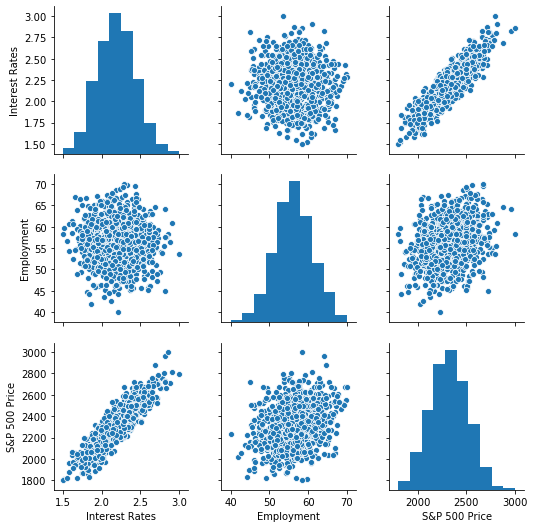

In [8]:
sns.pairplot(stock_df)
plt.show()

## Training & Testing the Data

In [33]:
y = stock_df['S&P 500 Price']
X = stock_df[['Interest Rates', 'Employment']]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = regressor.predict(X_test)

In [69]:
for i in np.arange(0, len(regressor.coef_)):
    print(f'Regression Coefficient b_{i+1}: {regressor.coef_[i]}')

print(f'Regression Intercept b_0: {regressor.intercept_}')

Regression Coefficient b_1: 729.2714699679545
Regression Coefficient b_2: 12.16067424339977
Regression Intercept b_0: 36.32483399720695


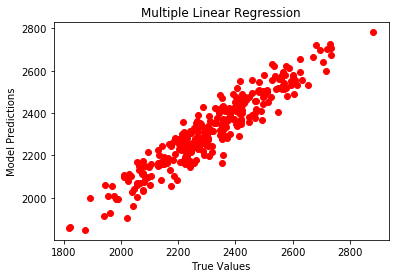

In [70]:
plt.scatter(y_test, y_pred, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('Multiple Linear Regression')
plt.show()

## Evaluating our Regression Model

In [71]:
k = X_test.shape[1]
n = len(X_test)

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)) , '.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( abs( (y_test-y_pred) / y_test  )  )*100

In [73]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  59.92 
MSE = 3590.460885487455 
MAE = 47.9149834692022 
R2 = 0.8934707088204449 
Adjusted R2 = 0.8927533398562728 
MAPE = 2.0834766570190415


## Visualizing our Results (3D Plot)

In [74]:
from mpl_toolkits.mplot3d import Axes3D
X_surf, y_surf = np.meshgrid(np.linspace( stock_df['Interest Rates'].min(), stock_df['Interest Rates'].max(), 100), np.linspace(stock_df['Employment'].min(), stock_df['Employment'].max(), 100))

In [75]:
X_surf.shape

(100, 100)

In [76]:
onlyX = pd.DataFrame({'Interest Rates' : X_surf.ravel(), 'Employment' : y_surf.ravel()})
fittedY = regressor.predict(onlyX)
fittedY = fittedY.reshape(X_surf.shape)

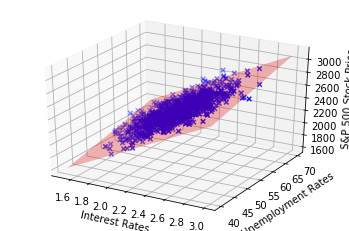

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock_df['Interest Rates'], stock_df['Employment'], stock_df['S&P 500 Price'], color='blue', marker='x')
ax.plot_surface(X_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('S&P 500 Stock Price')
plt.show()

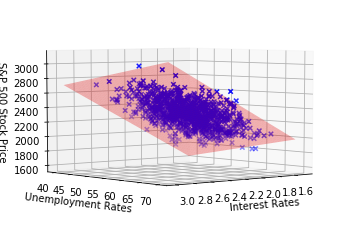

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock_df['Interest Rates'], stock_df['Employment'], stock_df['S&P 500 Price'], color='blue', marker='x')
ax.plot_surface(X_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('S&P 500 Stock Price')
ax.view_init(5, 50)
plt.show()

In [79]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,729.271470
Employment,12.160674
